[[3, 10], [3, 10], [2, 5], [1, 5], [1, 1]]
State.EMPTY
{(0, 1): [3, 10]}
[[3, 10], [2, 5], [1, 5], [1, 1]]


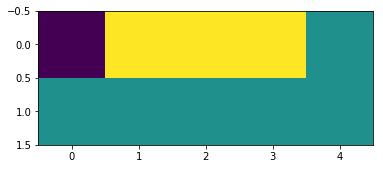

Multiple_knapsack_Problem (2racks,5slots)
Puissance totale 10, serveurs placés : 1
   (0, 1): size 3 puissance : 10


In [2]:
from Multiple_knapsack import Multiple_knapsack

# Build the Mutltiple_Knapsack problem according to a source file ( given a filePath )
problem = Multiple_knapsack("Sources_Files/dcEasy.in")

# Retrieving server List ( remaining one to place on the matrix )
print(problem.servers)

# Accessing the Matrix
# print(problem.matrix.shape)
# print(problem.matrix[0])  #  Print first line
# print(problem.matrix[0, 0])  #  Print first case

# Return the state given the coordinate     EMPTY = 0    SERVER = 1    UNAVAILABLE = -1
print(problem.getState(1, 0))

# Plot the game
# problem.plot()

# Place a server on the matrix
origin=(0,1)
problem.placeServer(origin,problem.servers[0])
# Now we can print the servers on the racks :
print(problem.placedServers)
# the remaining one are :
print(problem.servers)

problem.plot()

# Summary on the problem : 
print(problem)



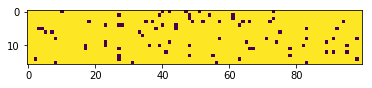

[[2, 28], [5, 55], [2, 40], [3, 18], [1, 6], [4, 68], [3, 18], [2, 40], [3, 60], [5, 25], [4, 60], [3, 27], [4, 24], [3, 36], [5, 95], [2, 26], [1, 19], [5, 45], [4, 56], [1, 17], [3, 51], [3, 15], [2, 10], [5, 95], [5, 45], [1, 19], [5, 30], [3, 18], [4, 68], [1, 12], [3, 27], [5, 55], [2, 26], [4, 32], [2, 40], [4, 48], [3, 18], [2, 20], [3, 24], [2, 12], [4, 32], [5, 90], [1, 8], [4, 32], [1, 19], [3, 36], [4, 68], [1, 6], [3, 33], [3, 48], [4, 80], [1, 11], [2, 36], [2, 16], [3, 33], [2, 16], [5, 60], [5, 65], [1, 20], [5, 100], [5, 90], [1, 12], [2, 22], [1, 11], [5, 45], [4, 48], [3, 60], [5, 65], [4, 28], [2, 40], [3, 39], [4, 20], [3, 39], [5, 35], [5, 30], [1, 14], [4, 32], [1, 19], [2, 28], [4, 44], [3, 39], [5, 40], [4, 32], [2, 30], [2, 20], [4, 24], [3, 60], [5, 30], [2, 18], [5, 95], [5, 50], [1, 18], [4, 56], [5, 75], [1, 18], [2, 30], [5, 35], [1, 6], [3, 27], [4, 64], [2, 30], [2, 24], [5, 90], [1, 11], [2, 10], [4, 60], [2, 32], [3, 33], [1, 6], [5, 95], [3, 54], [3, 

In [5]:
problem = Multiple_knapsack("Sources_Files/dc.in")
problem.plot()